In [2]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("dane2.csv")

In [84]:
df["created_at"] = df["created_at"].astype(str)
dzien_pl = {"Mon": "Poniedziałek", "Tue": "Wtorek", "Wed": "Środa", "Thu": "Czwartek", "Fri": "Piątek", "Sat": "Sobota", "Sun": "Niedziela"}
miesiac_num = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06", "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}

for eng, pol in dzien_pl.items():
    df["created_at"] = df["created_at"].str.replace(eng, pol)

for eng, num in miesiac_num.items():
    df["created_at"] = df["created_at"].str.replace(eng, num)

In [5]:
print(df[["created_at"]].head())

                           created_at
0  Czwartek 11 25 07:05:33 +0000 2021
1  Czwartek 11 25 07:13:03 +0000 2021
2  Czwartek 11 25 07:09:04 +0000 2021
3  Czwartek 11 25 06:52:05 +0000 2021
4  Czwartek 11 25 07:06:28 +0000 2021


In [6]:
def extract_tweet_links(column):
    links = []
    for entry in column.dropna():
        tweet_links = re.findall(r'https://twitter\.com/[^\s]+', entry)
        links.extend(tweet_links)
    return links

tweet_links_list = list(set(extract_tweet_links(df["media"])))
print(tweet_links_list)

['https://twitter.com/NKonfederacja/status/1462387817741438983/photo/1', 'https://twitter.com/zmianynaziemi/status/1463099775646007296/photo/1', 'https://twitter.com/Pikusiaaa/status/1462456294967844865/photo/1', 'https://twitter.com/mic_marek/status/1462509695638380553/photo/1', 'https://twitter.com/KuczynskiG/status/1463417597521715209/photo/1', 'https://twitter.com/KamilHeyka/status/1462483069865238535/photo/1', 'https://twitter.com/Cyntia_Harasim/status/1462412540915429379/photo/1', 'https://twitter.com/ZaZdzislaw/status/1462025595999731718/photo/1', 'https://twitter.com/VKouprich/status/1461641655363293189/photo/1', 'https://twitter.com/HyunminPppp/status/1461433135866933251/photo/1', 'https://twitter.com/szlachciura2/status/1462785102770053124/photo/1', 'https://twitter.com/mic_marek/status/1462392307215478788/photo/1', 'https://twitter.com/DKazmierczak96/status/1462538909418549255/photo/1', 'https://twitter.com/BIPolska/status/1462752246265835524/photo/1', 'https://twitter.com/R

In [7]:
def find_urls(text):
    return re.findall(r"https?://\S+", str(text))

df["urls"] = df["text"].apply(find_urls)
print(df[["urls"]])

                                                    urls
0                              [https://t.co/AOSWdj0Qqi]
1                                                     []
2                              [https://t.co/AOSWdj0Qqi]
3                              [https://t.co/1C0vkFuyPm]
4      [https://t.co/wEaRenIveL, https://t.co/6SfNANg...
...                                                  ...
10026                                                 []
10027                                                 []
10028                          [https://t.co/h83avChq83]
10029                                                 []
10030                                                 []

[10031 rows x 1 columns]


In [8]:
def find_media(text):
    return re.findall(r"https?://[^\s]+?\.(?:jpg|jpeg|png|gif)", str(text))

df["media"] = df["text"].apply(find_media)
print(df[["media"]])

      media
0        []
1        []
2        []
3        []
4        []
...     ...
10026    []
10027    []
10028    []
10029    []
10030    []

[10031 rows x 1 columns]


In [9]:
!python -m spacy download pl_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
nlp = spacy.load("pl_core_news_lg")

In [11]:
def remove_stopwords(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(filtered_tokens)

df["text_without_stopwords"] = df["text"].apply(remove_stopwords)
print(df["text_without_stopwords"])

0                Polska robi Rosja https://t.co/AOSWdj0Qqi
1        1 . Dotychczas Rosja rościła prawo wybiórczego...
2                Polska robi Rosja https://t.co/AOSWdj0Qqi
3        jaka niespodzianka . Ramzan Kadyrow Szef Repub...
4        GROŹNA ROSJA BIAŁORUŚ ? - Ukraina niebezpiecze...
                               ...                        
10026    @Kozlik_4 @Urbus _ @LaczyNasPilka Wystawiasz g...
10027    @RBakiewicz Niemcy , Wschód , Rosja , Białoruś...
10028    .@BartosiakJacek mówi Korwinem @JkmMikke \n " ...
10029    Rosją inwestować dezinformacje . BBC , CNN par...
10030    @EberhardtCeline @TheRepublicDe Rosja szantażu...
Name: text_without_stopwords, Length: 10031, dtype: object


In [19]:
print(df.columns.tolist())

['coordinates', 'created_at', 'hashtags', 'media', 'urls', 'favorite_count', 'id', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id', 'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at', 'user_id', 'user_default_profile_image', 'user_description', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_location', 'user_name', 'user_screen_name', 'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified', 'text_without_stopwords', 'day_of_week']


In [12]:
print("Top 5 tweetów z największą liczbą polubień:")
print(df.nlargest(5, "favorite_count")[["text", "favorite_count"]])

Top 5 tweetów z największą liczbą polubień:
                                                   text  favorite_count
400   Polska robi tak jak Rosja https://t.co/AOSWdj0Qqi            1527
5714  Uruchomienie Baltic Pipe w paźdz. 2022 w pełni...            1359
6455  Ukraiński wywiad (via Military Times) podaje, ...            1108
749   1.Dotychczas tylko Rosja rościła sobie prawo d...            1035
5539  Prosty komunikat\n\nW odpowiedzi na ataki/naru...             954


In [13]:
print("Top 5 tweetów z największą liczbą retweetów:")
print(df.nlargest(5, "retweet_count")[["text", "retweet_count"]])

Top 5 tweetów z największą liczbą retweetów:
                                                   text  retweet_count
1279  Niemcy i Francja negocjują z Rosją i Białorusi...            797
1280  Niemcy i Francja negocjują z Rosją i Białorusi...            797
1363  Niemcy i Francja negocjują z Rosją i Białorusi...            797
1385  Niemcy i Francja negocjują z Rosją i Białorusi...            797
1399  Niemcy i Francja negocjują z Rosją i Białorusi...            797


In [14]:
print("Tweety, które nie są uznane za wrażliwe:")
print(df[df["possibly_sensitive"] != True]["text"])

Tweety, które nie są uznane za wrażliwe:
0        Polska robi tak jak Rosja https://t.co/AOSWdj0Qqi
1        1.Dotychczas tylko Rosja rościła sobie prawo d...
2        Polska robi tak jak Rosja https://t.co/AOSWdj0Qqi
3        A tu jaka niespodzianka. Ramzan Kadyrow Szef R...
4        Jak GROŹNA jest ROSJA i BIAŁORUŚ? - Ukraina w ...
                               ...                        
10026    @Kozlik_4 @Urbus_ @LaczyNasPilka Wystawiasz go...
10027    @RBakiewicz nie Niemcy, a cały Wschód, Rosja, ...
10028    .@BartosiakJacek mówi Korwinem @JkmMikke \n"Is...
10029    Rosją już nie musi inwestować w dezinformacje....
10030    @EberhardtCeline @TheRepublicDe Rosja szantażu...
Name: text, Length: 9954, dtype: object


In [18]:
earliest_account = df.loc[df["user_created_at"].idxmin()]
print("Tweety użytkownika, który założył konto najwcześniej:")
print(df[df["user_id"] == earliest_account["user_id"]]["text"])

Tweety użytkownika, który założył konto najwcześniej:
5156    Czyli jesteśmy w momencie, gdzie Rosja sobie n...
8329    Międzynarodowy skandal: Rosja opublikowała pou...
Name: text, dtype: object


In [20]:
most_followers = df.loc[df["user_followers_count"].idxmax()]
print("Tweety użytkownika, który ma najwięcej followersów:")
print(df[df["user_id"] == most_followers["user_id"]]["text"])

Tweety użytkownika, który ma najwięcej followersów:
1252    Rosyjski lodołamacz o napędzie atomowym Arktyk...
1579    Minister obrony Rosji przekazał, że w listopad...
2725    Ukraiński wywiad poinformował o zwiększonej go...
2792    Moskiewski Sąd Miejski odroczył do 29 listopad...
4335    Rosja zaostrza sytuację bezpieczeństwa, by pod...
6286    Oczekujemy realnego wsparcia ze strony Stanów ...
7122    "Rosja nie zdecydowała jeszcze, co zamierza zr...
8190    Jak prezydent Rosji Władimir Putin postanowił ...
9698    1251 osób zmarło w Rosji w ciągu ostatniej dob...
Name: text, dtype: object


In [21]:
most_followers = df.loc[df["user_followers_count"].idxmax()]
print("Tweety użytkownika, który ma najwięcej followersów:")
print(df[df["user_id"] == most_followers["user_id"]]["text"])

Tweety użytkownika, który ma najwięcej followersów:
1252    Rosyjski lodołamacz o napędzie atomowym Arktyk...
1579    Minister obrony Rosji przekazał, że w listopad...
2725    Ukraiński wywiad poinformował o zwiększonej go...
2792    Moskiewski Sąd Miejski odroczył do 29 listopad...
4335    Rosja zaostrza sytuację bezpieczeństwa, by pod...
6286    Oczekujemy realnego wsparcia ze strony Stanów ...
7122    "Rosja nie zdecydowała jeszcze, co zamierza zr...
8190    Jak prezydent Rosji Władimir Putin postanowił ...
9698    1251 osób zmarło w Rosji w ciągu ostatniej dob...
Name: text, dtype: object


In [39]:
print("Tweety zweryfikowanych użytkowników:")
print(df[df["user_verified"] == True]["text"])

Tweety zweryfikowanych użytkowników:
50       Jakie kroki podejmują rosyjskie służby specjal...
54       A tu jaka niespodzianka. Ramzan Kadyrow Szef R...
68       Rosyjska armia gromadzi siły przy granicy z Uk...
99       Polska robi tak jak Rosja https://t.co/AOSWdj0Qqi
109      W środę z prezydentem #Rosja, Władimirem #Puti...
                               ...                        
9698     1251 osób zmarło w Rosji w ciągu ostatniej dob...
9756     Rzeczniczka MSZ #Rosja: Podżegacze wojenni z #...
9889     18 listopada 1875 roku Sokrates Starynkiewicz,...
9960     Jak to: jakie interesy białoruskie narusza Nor...
10015    PT Komentatorów BARDZO proszę: najpierw poczyt...
Name: text, Length: 247, dtype: object


for pl, eng in eng_day_format.items():
    df['created_at'] = df['created_at'].str.replace(pl, eng)

In [61]:
eng_day_format = {"Poniedziałek": "Mon", "Wtorek": "Tue", "Środa": "Wed", "Czwartek": "Thu", "Piątek": "Fri", "Sobota": "Sat", "Niedziela": "Sun"}

In [85]:
for pl, eng in eng_day_format.items():
    df["created_at"] = df["created_at"].str.replace(pl, eng)

df["created_at"] = pd.to_datetime(df["created_at"], format="%a %m %d %H:%M:%S +0000 %Y", errors='coerce')
df["day_of_week"] = df["created_at"].dt.dayofweek

day_counts = df["day_of_week"].value_counts().sort_index()
days = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]
day_counts.index = [days[i] for i in day_counts.index]

print("Liczba tweetów publikowanych w poszczególne dni tygodnia:")
print(day_counts)

Liczba tweetów publikowanych w poszczególne dni tygodnia:
Poniedziałek    1434
Wtorek          1656
Środa           1594
Czwartek        1465
Piątek          1465
Sobota           648
Niedziela       1769
Name: count, dtype: int64


In [73]:
most_common_day = day_counts.idxmax()
print(f"\nNajczęściej tweetowano w: {most_common_day}")


Najczęściej tweetowano w: Niedziela


In [81]:
def extract_entities(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    places = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]
    organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return pd.Series([persons, places, organizations])

df[["persons", "places", "organizations"]] = df["text"].apply(extract_entities)
print(df[["persons", "places", "organizations"]])

      persons places organizations
0          []     []            []
1          []     []            []
2          []     []            []
3          []     []            []
4          []     []            []
...       ...    ...           ...
10026      []     []            []
10027      []     []            []
10028      []     []            []
10029      []     []            []
10030      []     []            []

[10031 rows x 3 columns]


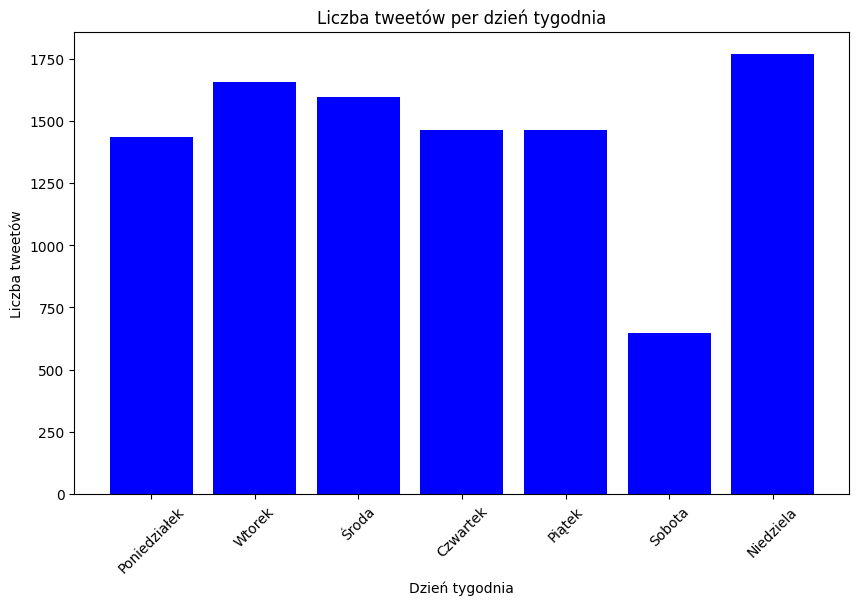

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color="blue")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba tweetów")
plt.title("Liczba tweetów per dzień tygodnia")
plt.xticks(rotation=45)
plt.show()